In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Arquivo de contigs gerado pelo Mummer

In [ ]:
contigs = pd.read_csv("KP.csv", sep=";")
contigs.head(3)

,start,end,S2,E2,LEN1,LEN2,%,IDY
0,1,50175,50163,100337,50175,50175,99.99,5393855
1,51506,74460,1,22955,22955,22955,100.00,5393855
2,74713,130912,1,56200,56200,56200,99.99,5393855


### Tratamento do arquivo

In [ ]:
# Criar a coluna Contig com fatores invertidos
contigs["Contig"] = range(len(contigs), 0, -1)

# Criar dataframe de gaps
gaps = pd.DataFrame({
    "start": contigs["end"].iloc[:-1].values + 1,
    "end": contigs["start"].iloc[1:].values - 1
})

gaps = gaps[gaps["start"] < gaps["end"]]
total_gap = gaps["end"].sum() - gaps["start"].sum()
percent_gap = round((total_gap/5500000)*100, 2)

### Criação da figura

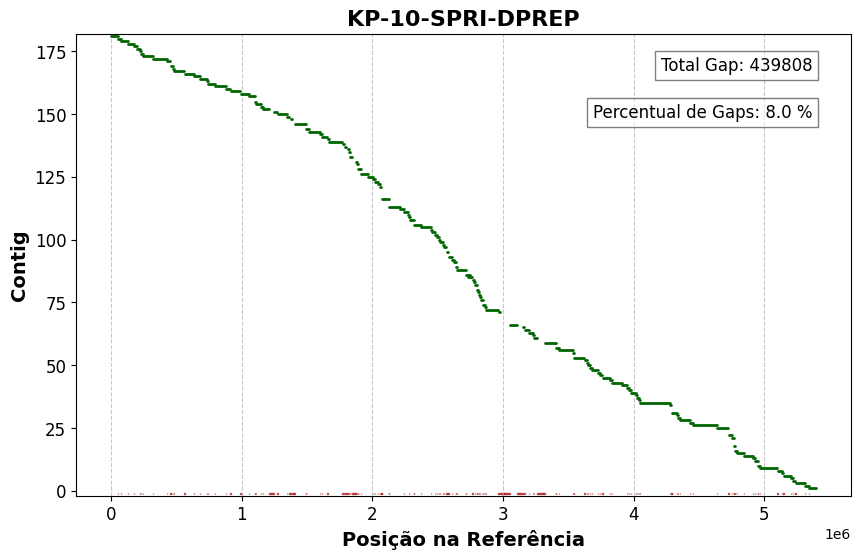

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar segmentos dos contigs
for _, row in contigs.iterrows():
    ax.plot([row["start"], row["end"]], [row["Contig"], row["Contig"]],
            linewidth=2, color='darkgreen', solid_capstyle='round')

# Plotar gaps como retângulos
for _, row in gaps.iterrows():
    ax.add_patch(plt.Rectangle((row["start"], -1.2), row["end"] - row["start"], 0.4, 
                               color='firebrick', alpha=0.8))

# Configurações do gráfico
ax.set_title("KP-10-SPRI-DPREP", fontsize=16, fontweight='bold')
ax.set_xlabel("Posição na Referência", fontsize=14, fontweight='bold')
ax.set_ylabel("Contig", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_ylim(-2, len(contigs) + 1)

# Adicionar texto com o total dos gaps
ax.text(0.95, 0.95, f"Total Gap: {total_gap}", transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

ax.text(0.95, 0.85, f"Percentual de Gaps: {percent_gap} %", transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Salvar a figura como PNG
plt.savefig("KP-10-SPRI-DPREP.png", dpi=600, bbox_inches='tight', format='png')
plt.show()